# Examples

## xarray integration

**run in an environment with h5coro installed**

Using the h5coro engine to open data in xarray.

In [ ]:
# import warnings

# warnings.filterwarnings('ignore')

In [1]:
import xarray as xr
import earthaccess

/home/jovyan/envs/h5coro-dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from h5coro.datasets import icesat2
col_convs = {} # {"delta_time": icesat2.to_datetime}

Accessing a cloud file

In [ ]:
s3url_atl03 = 'nsidc-cumulus-prod-protected/ATLAS/ATL03/006/2019/11/30/' \
                'ATL03_20191130112041_09860505_006_01.h5'
auth = earthaccess.login()
creds = auth.get_s3_credentials(daac='NSIDC')
ds = xr.open_dataset(s3url_atl03, engine='h5coro', group='/gt1l/heights', col_convs=col_convs, credentials=creds)
ds

Accessing a local file

In [ ]:
local_path = 'file:///home/jovyan/data/ATL03/processed_ATL03_20191130220138_09930502_006_01.h5'
ds = xr.open_dataset(local_path, engine='h5coro', group='/gt1l/heights')
ds

## What xarray typically returns

**run in an environment without h5coro installed**

Accessing cloud ATL03 data without using h5coro.

In [ ]:
import xarray as xr
import earthaccess

In [ ]:
s3url_atl03 = 'nsidc-cumulus-prod-protected/ATLAS/ATL03/006/2019/11/30/ATL03_20191130112041_09860505_006_01.h5'

In [ ]:
auth = earthaccess.login()
s3 = earthaccess.get_s3fs_session(daac="NSIDC", provider=auth)

In [ ]:
ds = xr.open_dataset(s3.open(s3url_atl03, 'rb'), group='/gt1l/heights')
ds

## Two-dimensional product example (ATL23 & ATL20)

In [1]:
import xarray as xr
import earthaccess

/home/jovyan/envs/h5coro-dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### ATL23 

(~90 second access time)

In [12]:
%%time

s3url_atl23 = 'nsidc-cumulus-prod-protected/ATLAS/ATL23/001/2023/03/' \
                '01/ATL23_20230401000000_10761801_001_01.h5'
auth = earthaccess.login()
creds = auth.get_s3_credentials(daac='NSIDC')
ds = xr.open_dataset(s3url_atl23, engine='h5coro', group='/mid_latitude/beam_1', credentials=creds)
ds

We are already authenticated with NASA EDL
CPU times: user 1min 11s, sys: 2.47 s, total: 1min 13s
Wall time: 1min 8s


<xarray.Dataset>
Dimensions:            (lat_dfw_0: 480, lat_dfw_1: 1440, geoid_avg_0: 480,
                        geoid_avg_1: 1440, dot_kurt_dfw_0: 480,
                        dot_kurt_dfw_1: 1440, dot_dfw_0: 480, dot_dfw_1: 1440,
                        length_sum_0: 480, length_sum_1: 1440,
                        length_dfw_0: 480, length_dfw_1: 1440,
                        dot_dfw_uncrtn_0: 480, dot_dfw_uncrtn_1: 1440,
                        ...
                        surf_prcnt_dfw_0: 480, surf_prcnt_dfw_1: 1440,
                        surf_prcnt_dfw_2: 5, lat_avg_0: 480, lat_avg_1: 1440,
                        swh_dfw_0: 480, swh_dfw_1: 1440, ice_conc_0: 480,
                        ice_conc_1: 1440, lon_dfw_0: 480, lon_dfw_1: 1440,
                        ssb_dfw_0: 480, ssb_dfw_1: 1440, dot_sigma_dfw_0: 480,
                        dot_sigma_dfw_1: 1440)
Dimensions without coordinates: lat_dfw_0, lat_dfw_1, geoid_avg_0, geoid_avg_1,
                                dot_kurt_dfw_0, dot_kurt_dfw_1, dot_dfw_0,
                                dot_dfw_1, length_sum_0, length_sum_1,
                                length_dfw_0, length_dfw_1, dot_dfw_uncrtn_0,
                                dot_dfw_uncrtn_1, dof_0, dof_1, dot_skew_dfw_0,
                                dot_skew_dfw_1, ssb_avg_0, ssb_avg_1,
                                ...
                                dot_sigma_avg_0, dot_sigma_avg_1,
                                surf_prcnt_dfw_0, surf_prcnt_dfw_1,
                                surf_prcnt_dfw_2, lat_avg_0, lat_avg_1,
                                swh_dfw_0, swh_dfw_1, ice_conc_0, ice_conc_1,
                                lon_dfw_0, lon_dfw_1, ssb_dfw_0, ssb_dfw_1,
                                dot_sigma_dfw_0, dot_sigma_dfw_1
Data variables: (12/34)
    lat_dfw            (lat_dfw_0, lat_dfw_1) float64 ...
    geoid_avg          (geoid_avg_0, geoid_avg_1) float64 ...
    dot_kurt_dfw       (dot_kurt_dfw_0, dot_kurt_dfw_1) float64 ...
    dot_dfw            (dot_dfw_0, dot_dfw_1) float64 ...
    length_sum         (length_sum_0, length_sum_1) float32 ...
    length_dfw         (length_dfw_0, length_dfw_1) float32 ...
    ...                 ...
    lat_avg            (lat_avg_0, lat_avg_1) float64 ...
    swh_dfw            (swh_dfw_0, swh_dfw_1) float64 ...
    ice_conc           (ice_conc_0, ice_conc_1) float32 ...
    lon_dfw            (lon_dfw_0, lon_dfw_1) float64 ...
    ssb_dfw            (ssb_dfw_0, ssb_dfw_1) float64 ...
    dot_sigma_dfw      (dot_sigma_dfw_0, dot_sigma_dfw_1) float64 ...
Attributes:
    Description:  This group contains data for beams 1, 3, and 5 (strong beam...

In [21]:
# mask out nodata values
depth_dfw = ds.depth_dfw.where(ds.depth_dfw < 3.4*10**38)

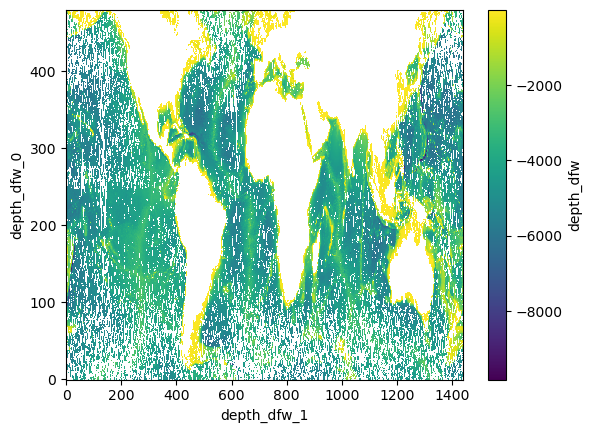

In [22]:
# Must have matplotlib installed in the environment for this example to work
depth_dfw.plot()

### ATL20 

(~5 second access time)

In [30]:
%%time

s3url_atl20 = 'nsidc-cumulus-prod-protected/ATLAS/ATL20/004/2023/03/' \
                '01/ATL20-02_20230301013253_10771801_004_01.h5'
auth = earthaccess.login()
creds = auth.get_s3_credentials(daac='NSIDC')
ds = xr.open_dataset(s3url_atl20, engine='h5coro', group='/monthly', credentials=creds)
ds

We are already authenticated with NASA EDL
CPU times: user 1.15 s, sys: 117 ms, total: 1.27 s
Wall time: 4.86 s


<xarray.Dataset>
Dimensions:         (delta_time_end: 1, sigma_0: 332, sigma_1: 316,
                     length_sum_0: 332, length_sum_1: 316, delta_time_beg: 1,
                     mean_fb_0: 332, mean_fb_1: 316, n_segs_0: 332,
                     n_segs_1: 316)
Coordinates:
  * delta_time_end  (delta_time_end) float64 1.655e+08
  * delta_time_beg  (delta_time_beg) float64 1.629e+08
Dimensions without coordinates: sigma_0, sigma_1, length_sum_0, length_sum_1,
                                mean_fb_0, mean_fb_1, n_segs_0, n_segs_1
Data variables:
    sigma           (sigma_0, sigma_1) float32 ...
    length_sum      (length_sum_0, length_sum_1) float32 ...
    mean_fb         (mean_fb_0, mean_fb_1) float32 ...
    n_segs          (n_segs_0, n_segs_1) int32 ...
Attributes:
    Description:  Gridded Monthly averages

In [31]:
# mask out nodata values
mean_fb = ds.mean_fb.where(ds.mean_fb < 3.4*10**38)

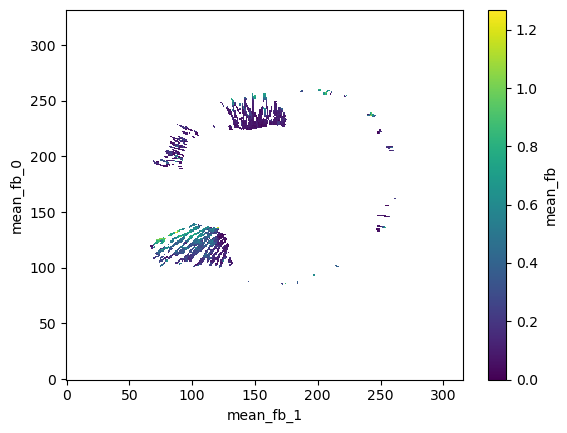

In [32]:
# Must have matplotlib installed in the environment for this example to work
mean_fb.plot()